'----------------------------------------'

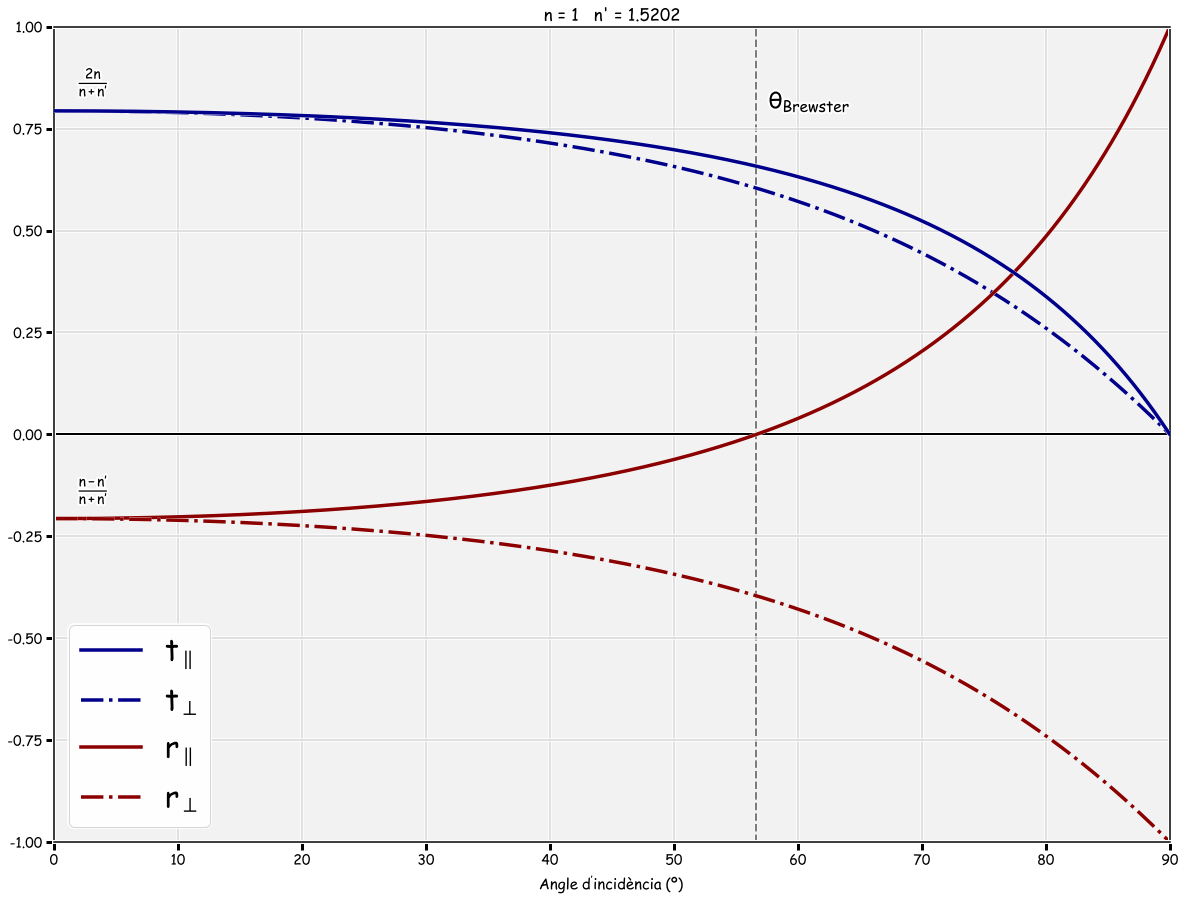

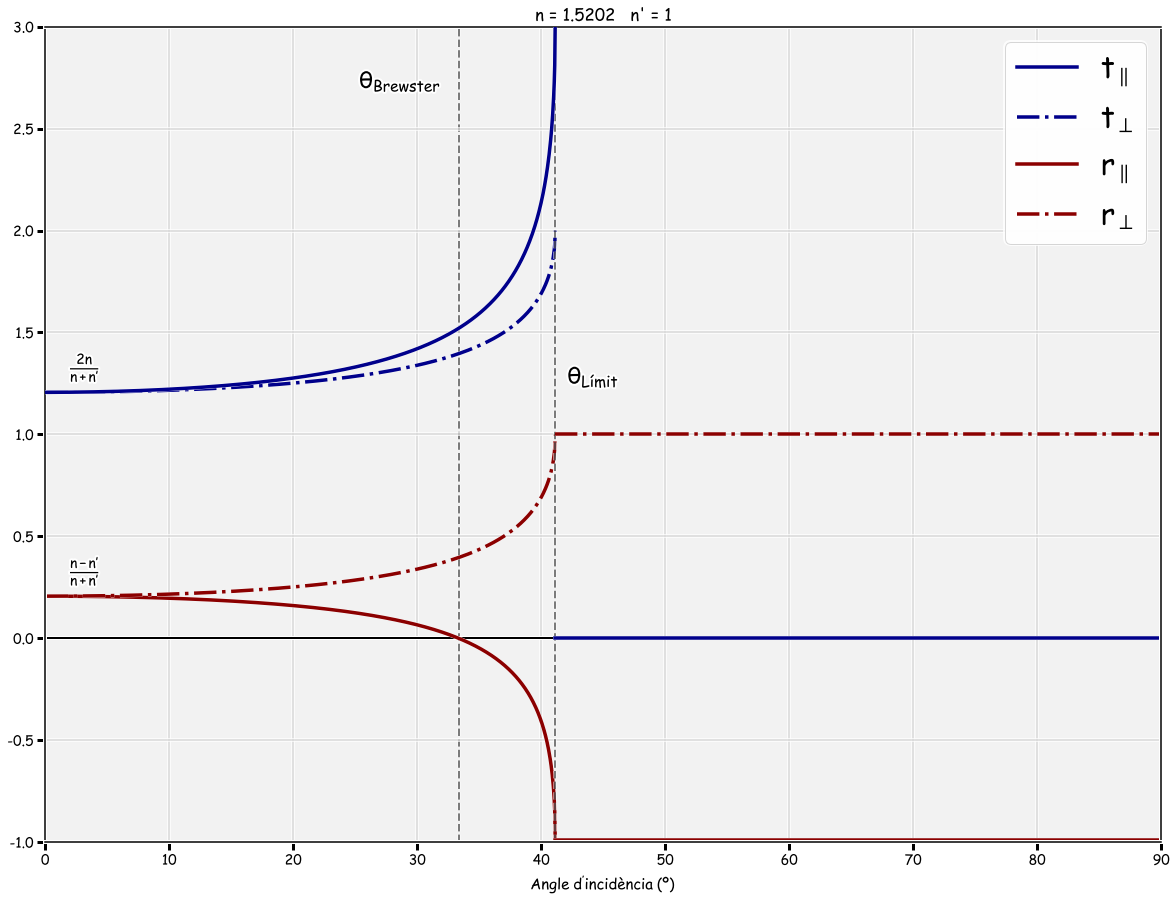

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'mathtext.default':'regular'}) #permet l'ús de llenguatge LaTeX en matplotlib



"""Generació coeficients de Fresnel"""

"""Funció fresnel
Arguments:
final: Valor màxim i límit del domini d'angles d'incidència
itera: Nombre de punts a generar en el domini
n: índex de refracció medi incident
nPrima: índex de refracció medi refractat

Retorna:
Llista que conté 5 llistes, una amb els angles d'incidència, 
les altres 4 contenen els coeficients de fresnel calculats a cada punt del domini.
"""
def fresnel (final, itera, n, nPrima):
    
    #Llista de les abcisses
    angleI=np.linspace(0,final,itera)  #Angles d'incidència
    angleT=np.arcsin(n/nPrima *np.sin(angleI)) #Angles de transmissió mitjançant llei de Snell
    
    #Fòrmules de fresnel calculades a cada punt de angleI
    r_p = np.tan(angleT-angleI)/np.tan(angleT+angleI) #coef reflexió paral·lela
    r_n = np.sin(angleT-angleI)/np.sin(angleT+angleI) #coef reflexió normal

    t_p = 2*np.sin(angleT)*np.cos(angleI)/(np.sin(angleT+angleI)*np.cos(angleT-angleI)) #coef transmisió paral·lela
    t_n = 2*np.sin(angleT)*np.cos(angleI)/(np.sin(angleT+angleI)) #coef transmisió normal
    
    return angleI,t_p,t_n,r_p,r_n
    #---

#En el nostre cas:    
n1=1    
n2=1.5202
itera=1000

angleBrewster1=np.arctan(n2/n1) #Determinació de l'angle de Brewster quan n' > n
angleBrewster2=np.arctan(n1/n2) #Determinació de l'angle de Brewster quan n' < n
angleLimit=np.arcsin(n1/n2) #Determinació de l'angle límit (només definit quan n'< n)


#Truquem la funció pel cas n>n' i n<n' i guardem les dades generades
Data=[fresnel(np.pi/2,itera,n1,n2),fresnel(angleLimit,itera,n2,n1)]

"""----------------------------------------"""





"""Respresentació gràfica"""
plt.xkcd(0)

#A repetir dos cops, un per a cada figura
for i in range(2):
    
    
    plt.figure(i,figsize=(20,15)) #Creació figura
    
    #Paràmetres comuns a les dues figures
    plt.axes(facecolor=(0.95,0.95,0.95)) #Color de fons
    plt.grid(which='both',color='k',linestyle='-',linewidth=0.3,alpha=0.7) #Quadrícula
    plt.xlim(0,90) #Límits de l'eix horitzontal
    plt.axhline(color='black',label='_nolegend_') #Línia horitzontal de l'origen (forcem que no aparegui a la llegenda)
    plt.xlabel("$Angle \\ d'incidència \\ (º)$",fontsize=15) #Etiqueta eix absiccises
    
    #Obtenim els angles d'incidència i els passem a radians
    Incidencia=np.degrees(Data[i][0]) 
    
    #Ara fem plot dels 4 coeficients
    plt.plot(Incidencia, Data[i][1],color='darkblue',linestyle='-',linewidth=3.5,zorder=5)
    plt.plot(Incidencia, Data[i][2],color='darkblue',linestyle='-.',linewidth=3.5)
    plt.plot(Incidencia, Data[i][3],color='darkred',linestyle='-',linewidth=3.5)
    plt.plot(Incidencia, Data[i][4],color='darkred',linestyle='-.',linewidth=3.5)
    
    #Llegenda
    plt.legend(("$t_{\parallel}$",'$t_{\perp}$','$r_{\parallel}$','$r_{\perp}$'),fontsize=30)
#---



#Línies i marcadors adiccionals

#Primera figura
fig1=plt.figure(0)
plt.title("n = 1   n' = 1.5202") #Títol
plt.ylim(-1,1) #Límits eix vertical

Brewster_Line=plt.axvline(x=np.degrees(angleBrewster1),color='black',linestyle='--',alpha=0.5,zorder=1) #Línia vertical de l'angle de Brewster
plt.annotate('$\\theta_{Brewster}$',xy=(np.degrees(angleBrewster1)+1,0.8),fontsize=22)
plt.annotate('$\\frac{2n}{n+n\\prime}$',xy=(2,0.85),fontsize=20)
plt.annotate('$\\frac{n-n\\prime}{n+n\\prime}$',xy=(2,-0.15),fontsize=20)


#Segona figura
fig2=plt.figure(1)
plt.title("n = 1.5202   n' = 1") #Títol
plt.ylim(-1,3) #Límits eix vertical
angleLimit_Line=plt.axvline(x=np.degrees(angleLimit),color='black',linestyle='--',alpha=0.5)
plt.annotate('$\\theta_{Límit}$',xy=(np.degrees(angleLimit)+1,1.25),fontsize=22)
Brewster2_Line=plt.axvline(x=np.degrees(angleBrewster2),color='black',linestyle='--',alpha=0.5, zorder=1)
plt.annotate('$\\theta_{Brewster}$',xy=(np.degrees(angleBrewster2)-8,2.7),fontsize=22)
plt.annotate('$\\frac{2n}{n+n\\prime}$',xy=(2,1.3),fontsize=20)
plt.annotate('$\\frac{n-n\\prime}{n+n\\prime}$',xy=(2,0.3),fontsize=20)
plt.axhline(y=1,xmin=0.457,color='darkred',linestyle='-.',linewidth=3.5) 
plt.axhline(y=-0.99,xmin=0.457,color='darkred',linestyle='-',linewidth=3.5)
plt.axhline(y=0,xmin=0.457,color='darkblue',linestyle='-',linewidth=3.5)

"""----------------------------------------"""




#Exportació de les dues figures
#fig1.savefig('figure1Optica.svg', format='svg',bbox_inches="tight")
#fig2.savefig('figure2Optica.svg', format='svg',bbox_inches="tight")

